In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src
import numpy as np
df = pd.read_csv('../timEda/genres-budget.csv')


In [3]:
df.head() 
df.genres = src.string_from_list(df, 'genres')
df.genres = src.coerce_to_list(df, 'genres')


In [4]:
def categorize_production(x):
    m = int(x)
    k=''
    if m < 5000000:
        k = 'small'
    if 5000000 <= m <= 100000000:
        k = 'medium'
    if m > 100000000:
        k = 'large'
    return k
df['budget_category'] = df['production_budget'].apply(lambda x: categorize_production(x))

In [5]:
df_large = df[df.budget_category == 'large']
df_medium = df[df.budget_category == 'medium']
df_small = df[df.budget_category == 'small']


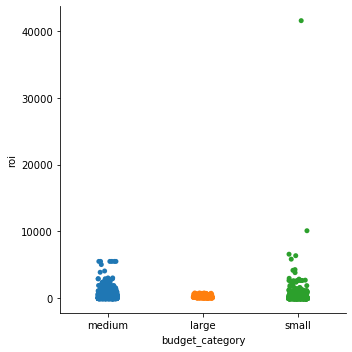

In [6]:
sns.catplot(x="budget_category", y="roi", data=df)

In [7]:
len(df_large)

234

In [8]:
data_frame_list = [df_large, df_medium, df_small]
genre_budget = []
for df in data_frame_list:
    genre_budget.append(src.genre_pandas_mean(df, 'roi'))


In [9]:
def change_index_to_column_add_names(df_list, column_names):
    for df in df_list:
        df.reset_index(level=0, inplace=True)
        df.columns = column_names
    return 

In [12]:
change_index_to_column_add_names(genre_budget, ['genre', 'roi'])


In [13]:
for f in genre_budget:
    f.sort_values('genre', inplace = True)

In [14]:
small_df = genre_budget[0]
medium_df = genre_budget[1]
large_df = genre_budget[2]

small_df['category'] = 'small'
medium_df['category'] = 'medium'
large_df['category'] = 'large'
combined_df =pd.concat([small_df, medium_df, large_df])
#smallmed_df = small_df.merge(medium_df, on = 'genre')
#combined_df = smallmed_df.merge(large_df, on = 'genre')
#combined_df.columns = ['genre','small_budget', 'medium_budget', 'large_budget']
#combined_df
combined_df



,genre,roi,category
10,Action,224.931680,small
9,Adventure,233.271830,small
7,Animation,262.260057,small
3,Biography,341.451983,small
8,Comedy,235.840616,small
...,...,...,...
9,Sci-Fi,77.235494,large
14,Sport,-36.875907,large
2,Thriller,735.545143,large
15,War,-44.871452,large


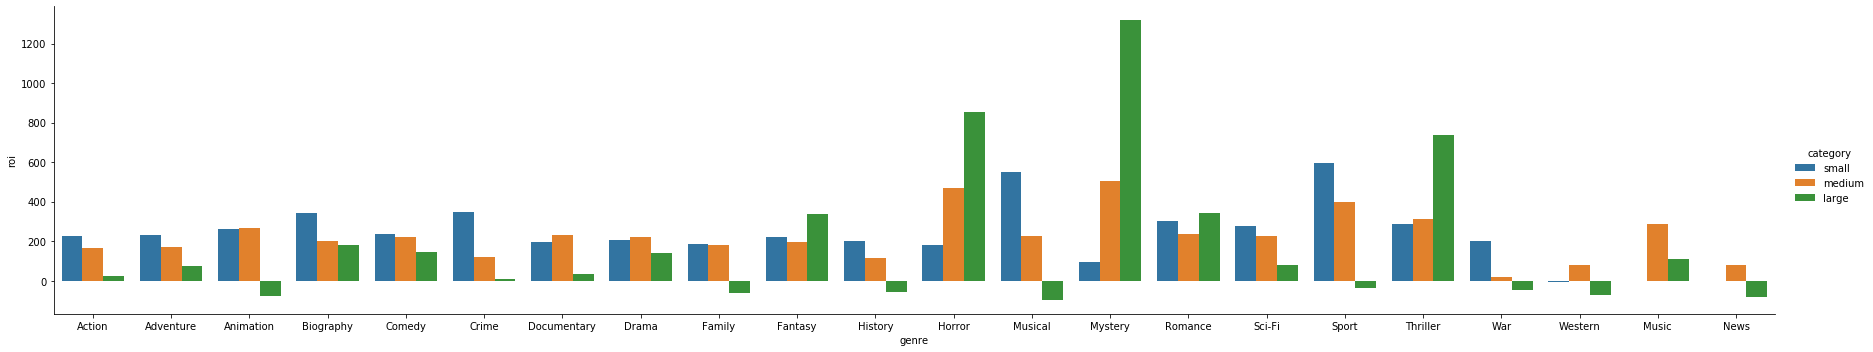

In [15]:

ax1 = sns.catplot(x = 'genre', y = 'roi', hue = 'category', data = combined_df, kind = 'bar', height = 5, aspect =5)


In [16]:
sns.catplot(x="genre", y="survived", hue="class", kind="bar", data=)

SyntaxError: invalid syntax (<ipython-input-16-cdea79c1725f>, line 1)